In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:

# Create a Model
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, h3=8, h4=8, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.out = nn.Linear(h4, out_features)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        
        return x
        

In [41]:
torch.manual_seed(42)
model = Model()
#device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to("cuda")

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:

iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
my_df = pd.read_csv(iris_url, header=None)
my_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
my_df[4] = my_df[4].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [45]:
my_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
my_df[4].value_counts()

4
0    50
1    50
2    50
Name: count, dtype: int64

In [47]:
#Train Test Split
X = my_df.drop(4, axis=1)
y = my_df[4]

In [48]:
#Cnvert to numpy array
X = X.values
y = y.values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [51]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [52]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [53]:
# Set the ctitrion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [54]:
#Train the model    
epochs = 20000
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        print(f'Epoch {i} and loss is: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch 0 and loss is: 1.1046143770217896
Epoch 10 and loss is: 1.1038163900375366
Epoch 20 and loss is: 1.1030781269073486
Epoch 30 and loss is: 1.102362871170044
Epoch 40 and loss is: 1.1016552448272705
Epoch 50 and loss is: 1.100914716720581
Epoch 60 and loss is: 1.0999161005020142
Epoch 70 and loss is: 1.098634123802185
Epoch 80 and loss is: 1.097332239151001
Epoch 90 and loss is: 1.0960949659347534
Epoch 100 and loss is: 1.094896674156189
Epoch 110 and loss is: 1.0937366485595703
Epoch 120 and loss is: 1.0926138162612915
Epoch 130 and loss is: 1.0915374755859375
Epoch 140 and loss is: 1.090482234954834
Epoch 150 and loss is: 1.0894885063171387
Epoch 160 and loss is: 1.0886080265045166
Epoch 170 and loss is: 1.0877892971038818
Epoch 180 and loss is: 1.0869818925857544
Epoch 190 and loss is: 1.0861696004867554
Epoch 200 and loss is: 1.0853400230407715
Epoch 210 and loss is: 1.0844882726669312
Epoch 220 and loss is: 1.0836101770401
Epoch 230 and loss is: 1.08270263671875
Epoch 240 and 

Text(0, 0.5, 'Loss')

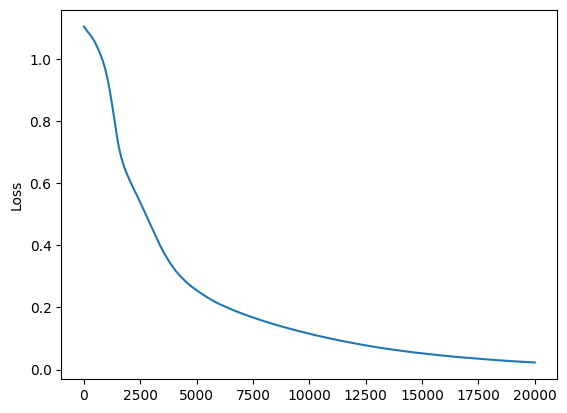

In [55]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')

In [56]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    print(f'Loss: {loss}')

Loss: 0.3403947055339813


In [57]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct!')
        

1.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
2.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
3.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
4.) tensor([-14.1855,  17.7709, -19.9355]) 	 1
5.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
6.) tensor([-21.2730,  28.9967, -33.5844]) 	 1
7.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
8.) tensor([-14.7494,  18.6476, -20.9272]) 	 1
9.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
10.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
11.) tensor([-1.8328, -1.4349,  1.7887]) 	 2
12.) tensor([  9.5780,  -2.5597, -73.1694]) 	 0
13.) tensor([  8.2561,  -2.3596, -64.9187]) 	 0
14.) tensor([ -8.2626,  14.4767, -43.2813]) 	 1
15.) tensor([  9.4746,  -2.5440, -72.5240]) 	 0
16.) tensor([-4.7196,  3.0534, -3.2882]) 	 2
17.) tensor([  8.9426,  -2.4635, -69.2035]) 	 0
18.) tensor([-1.8328, -1.4349,  1.7887]) 	 1
19.) tensor([  9.0923,  -2.4861, -70.1380]) 	 0
20.) tensor([  7.8739,  -2.3017, -62.5335]) 	 0
21.) tensor([-13.3504,  20.3136, -40.3579]) 	 1
22.) tensor([-1.8328, -1.4349, 